In [1]:
import numpy as np
import math
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg
from matplotlib import pyplot as plt


In [2]:
n = 123

X_train, y_train = load_svmlight_file(r'D:/testing/file/a9a.txt', n_features=n)
X_test, y_test = load_svmlight_file(r'D:/testing/file/a9a.t', n_features=n)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

# 将世纪值中的-1统一转换成为0
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0
# 请教了同学，需要做如下变换，转换为列向量，为了后面的矩阵运算
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(y_train.shape)
print(y_test.shape)
print(y_train)
print(y_test)

(32561, 123)
(16281, 123)
(32561,)
(16281,)
[-1. -1. -1. ..., -1. -1.  1.]
(32561, 1)
(16281, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 1.]]
[[ 0.]
 [ 0.]
 [ 1.]
 ..., 
 [ 0.]
 [ 0.]
 [ 1.]]


In [3]:


def sigmod(x):
    return 1 / (1 + np.exp(-x))


# 大佬建议直接生成列向量，方便下列的运算，矩阵不必经常转置了
def random_param(n):
    return np.random.normal(0, 1, size=(n, 1))


# X : θ.T x，类型为np.narray
# y : 实际值
def loss(x, y):
    return -1 / y.shape[0] * (y * np.log(sigmod(x)) +  (1 - y) * np.log(1 - sigmod(x))).sum()



# bs : batch size
# cnt: 迭代次数
# w  : θ参数，numpy数组
# lr : 学习率learning rate
def logistic_regression(bs, cnt, w, lr):
    loss_train = []
    loss_test = []
    pre_train = []
    pre_test = []
    figure_x = []
    iter_time = 1
    #print(w)
    for it in range(cnt):
        for j in range(math.ceil(X_train.shape[0] / bs)):
            # 随机抽取样本 
            sam_idxs = np.random.choice(X_train.shape[0], size=bs)
            sample_x = X_train[sam_idxs]
            sample_y = y_train[sam_idxs]
            delta = sample_x.T.dot(sigmod(sample_x.dot(w)) - sample_y)
            delta = -delta
            w += lr * delta
            # 记录迭代次数
        figure_x.append(iter_time)
        iter_time += 1

        h_train = X_train.dot(w)
        h_test = X_test.dot(w)
        # 计算loss值
        loss_train.append(loss(h_train, y_train))
        loss_test.append(loss(h_test, y_test))
#     转成数组效率极低，舍弃，请教同学直接用矩阵运算
#         i = 0
#         while(i <= X_train.shape[0]-bs):
#             deltas = 0.0
#             for j in range(X_train.shape[1]):
#                 for b in range(bs): 
#                     deltas += (sigmod(w, X_train_arr[i+b])-y_train[i+b]) * X_train_arr[i+b][j]
#                 deltas = deltas * lr / bs
#                 w[j] -= deltas
# #             # 计算loss值
# #             loss_train.append(loss(X_train_arr, y_train, w))
# #             loss_test.append(loss(X_test_arr, y_test, w))
# #             # 计算h(x)
            
# #             # 记录迭代次数
# #             figure_x.append(iter_time)
# #             iter_time += 1
#             i += bs
#     #print(w)
    return iter_time, loss_train, loss_test

In [4]:
batch_size = 30
count = 300
w = random_param(n)
lr = 1e-5
iter_time, loss_train, loss_test = logistic_regression(batch_size, count, w, lr)

In [32]:
# print(loss_train)
# print(loss_test)

[22.105407383514649, 22.019940089203011, 21.932145246884957, 21.862350662464554, 21.776241876518473, 21.688853183591331, 21.628663999261384, 21.550376912202573, 21.467695330648151, 21.382013133058923, 21.326699386434697, 21.252802649672958, 21.204624054923652, 21.130617377198522, 21.031125680079988, 20.952003815325767, 20.87406085982974, 20.813555956927043, 20.737237410965129, 20.684281140140008, 20.630129040471726, 20.551091423138708, 20.500541775378185, 20.40217798014546, 20.334993826818582, 20.290278198426773, 20.217031842799685, 20.154958686217913, 20.065276209523681, 19.990537776029807, 19.923413356669283, 19.841640642340479, 19.777602767176699, 19.707435268353347, 19.642788599051968, 19.565377392526027, 19.480002625612112, 19.424972858306155, 19.348173117234992, 19.269684581012232, 19.19666393757965, 19.105307857386396, 19.029927263053548, 18.937144232072566, 18.861123651012662, 18.774676221719119, 18.689438189349673, 18.602255611115424, 18.52735294014925, 18.441383873474511, 18.

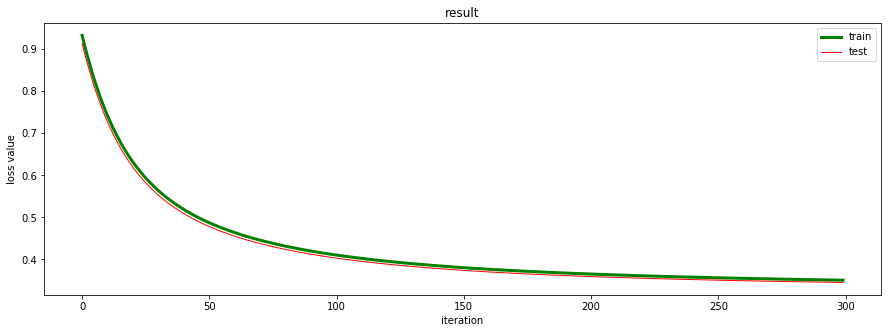

In [5]:
plt.figure(figsize=[15,5])
plt.title('result')
plt.plot(loss_train, c='g',linewidth=3, label='train')
plt.plot(loss_test, c='r', linewidth=1, label='test')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [6]:


def svm_loss(x, y, C):
    hinge_loss = np.maximum(0, 1 - x*y)
    return hinge_loss.sum() / y.shape[0]


# w = random_param(n)
# print(svm_loss(X_train.dot(w), y_train, 1))
# print(svm_loss(X_test.dot(w), y_test, 1))


def SVM(bs, cnt, w, lr, C):
    loss_train = []
    loss_test = []
    pre_train = []
    pre_test = []
    figure_x = []
    # 请教同学改了了写法
    idxs = np.arange(X_train.shape[0])
    #print(w)
    for it in range(cnt):
        for j in range(math.ceil(X_train.shape[0] / bs)):
            sam_idxs = np.random.choice(X_train.shape[0], size=bs)
            sample_x = X_train[sam_idxs]
            sample_y = y_train[sam_idxs]
            
            copy_y = sample_y.copy()
            # condition为以样本数量为行数的列向量
            condition = 1 - sample_y * sample_x.dot(w)
            # 请教同学有更好的写法如下
            # 根据公式，将样本算出的值 < 0的对应的位置置为0，为了将两种情况统一书写
            # 因为 -sample_x.T.dot(copy_y) 中只要copy_y中某一项为0，那么对应位置结果也为0，可以统一公式书写
            copy_y[condition < 0] = 0
            L = w - C / sample_x.shape[0] * (sample_x.T.dot(copy_y))
            w -= L * lr
            
        h_train = X_train.dot(w)
        h_test = X_test.dot(w)
        # 计算loss值
        loss_train.append(svm_loss(h_train, y_train, C))
        loss_test.append(svm_loss(h_test, y_test, C))
        
    return loss_train, loss_test

In [7]:
# test
# from scipy.sparse import csr_matrix
# arr = np.array([[0,1,0,2,0],[1,1,0,2,0],[2,0,5,0,0]])
# b =  csr_matrix(arr)

# c = np.array([1, 1, 1, 2, 1])
# c.reshape(c.shape[0], 1)
# d = b*c
# print(d)
# print(1-d)

In [7]:
batch_size = 30
count = 500
w = random_param(n)
lr = 1e-5
C = 1
loss_train2, loss_test2 = SVM(batch_size, count, w, lr, C)

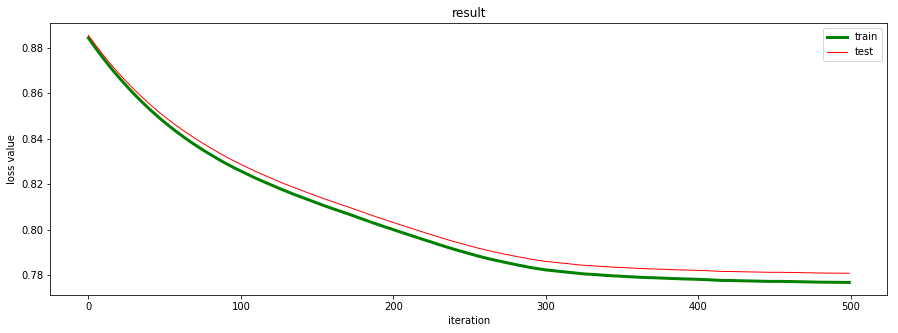

In [8]:
plt.figure(figsize=[15,5])
plt.title('result')
plt.plot(loss_train2, c='g',linewidth=3, label='train')
plt.plot(loss_test2, c='r', linewidth=1, label='test')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()